# Classification MNIST 🚐

 this chapter, we will be using the MNIST dataset, which is a set of 70,000 small
images of digits handwritten by high school students and employees of the US Cen‐
sus Bureau. Each image is labeled with the digit it represents. This set has been stud‐
ied so much that it is often called the “Hello World” of Machine Learning: whenever
people come up with a new classification algorithm, they are curious to see how it
will perform on MNIST. Whenever someone learns Machine Learning, sooner or
later they tackle MNIST.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load modal
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Load evaluation metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load train test split

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

## Data Imports and preprocessing

In [2]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784', version=1)

mnist.keys()

/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
df=pd.DataFrame(mnist['data'],columns=mnist['feature_names'])

df['target']=mnist['target']

 


In [4]:
X, y = mnist["data"], mnist["target"]

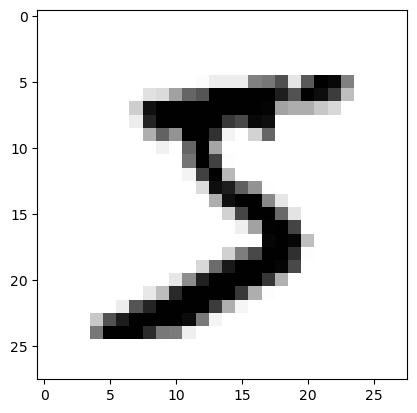

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit=np.array(X.loc[0])

some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")

In [6]:
# change y to int

y=y.astype(int)
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

## split the data

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# function to show image

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as pl
def showImage(idx):
  """
  this function helps us to visual image
  """
  some_digit=np.array(X.loc[idx])

  some_digit_image = some_digit.reshape(28, 28)

  plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")

#Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for
this classification task:

In [10]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)
y_train

47339    5
67456    4
12308    8
32557    0
664      2
        ..
37194    6
6265     6
54886    1
860      0
15795    0
Name: class, Length: 56000, dtype: int64

#Choosing the right estimator

 A good place to start is with a Stochastic
Gradient Descent `(SGD) classifier`, using Scikit-Learn’s SGDClassifier can handle large data



In [11]:
from sklearn.linear_model import SGDClassifier

clf=SGDClassifier(random_state=42)

# fit the modal
clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [12]:
clf.score(x_test,y_test)

0.09621428571428571

In [13]:
# detect image

clf.predict([some_digit])

/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

# Performance Measures

Measuring Accuracy Using Cross-Validation

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf,x_train,y_train_5,cv=3,scoring="accuracy")

# here we do 3 fold

array([0.97192907, 0.96855413, 0.96024858])

Wow! Above 93% accuracy (ratio of correct predictions) on all cross-validation folds?
This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very
dumb classifier that just classifies every single image in the “not-5” class:

In [15]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
     pass
  def predict(self, X):
   return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()


In [16]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,x_train,y_train,cv=5,scoring="accuracy")

array([0.10339286, 0.09803571, 0.10044643, 0.09660714, 0.09794643])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the time. Beats Nostradamus.

# Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confu‐
sion matrix.

The general idea is to count the number of times instances of class A are
classified as class B

In [17]:
from sklearn.model_selection import cross_val_predict
#
y_train_pred = cross_val_predict(clf, x_train, y_train_5, cv=3)

Text(0.5, 23.52222222222222, 'Predicted Label')

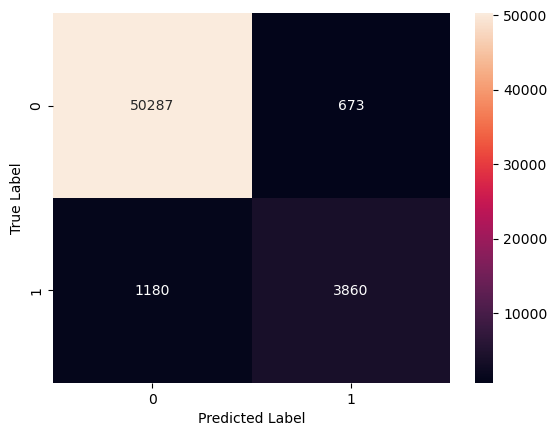

In [18]:
from sklearn.metrics import confusion_matrix

matrix=confusion_matrix(y_train_5, y_train_pred)

sns.heatmap(matrix,annot=True,
            fmt='d'
            )
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

In [19]:
matrix

array([[50287,   673],
       [ 1180,  3860]])

In [20]:

from sklearn.metrics import *
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels

    """

    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)}

    print(f"Acc:{accuracy*100:.2f} %")
    print(f"Precision:{precision* 100:.2f} %")
    print(f"Recall:{recall* 100:.2f} %")
    print(f"F1:{f1*100:.2f} %")

    return metric_dict


`Precision` — _What percent of your predictions were correct?_

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

Precision:- Accuracy of positive predictions.

Precision = TP/(TP + FP)

`Recall` — _What percent of the positive cases did you catch?_

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- **Fraction of positives that were correctly identified**.

Recall = TP/(TP+FN)

`F1 score` —**_What percent of positive predictions were correct?_**

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

###  Conversely,
lowering the threshold increases recall and reduces precision

In [21]:
evaluate_preds(y_train_5,y_train_pred)

Acc:96.69 %
Precision:85.15 %
Recall:76.59 %
F1:80.64 %


{'accuracy': 0.97, 'precision': 0.85, 'recall': 0.77, 'f1': 0.81}

## Tune the Threshold

Scikit-Learn does not let you set the threshold directly, but it does give you access to
the decision scores that it uses to make predictions. Instead of calling the classifier’s
predict() method, you can call its `decision_function()` method

In [24]:
y_scores=cross_val_predict(clf,x_train,y_train_5,cv=3,method="decision_function")

y_scores

array([  2620.11888047, -21468.63800421,    732.41439205, ...,
        -9619.64253191, -12620.86414512, -14196.89329626])

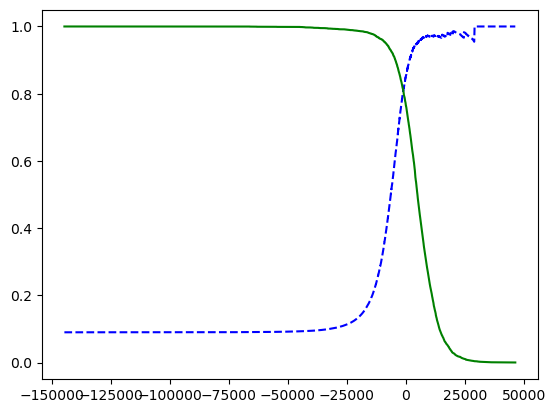

## The ROC Curve

it used with Binary Classifier

The ROC curve plots the true positive rate (another name for recall) against the false

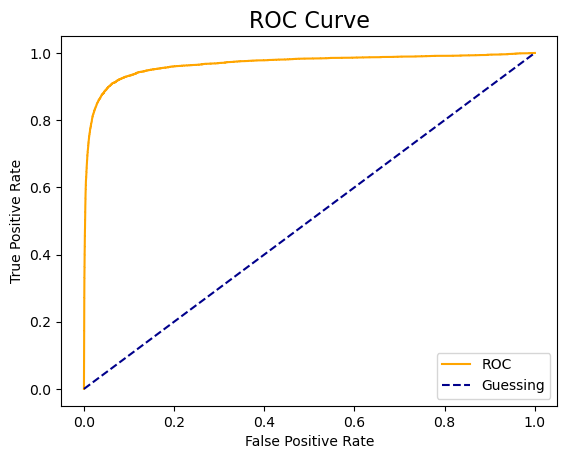

In [29]:
# lets create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    fig,ax=plt.subplots()
    # plot roc curve
    ax.plot(fpr,tpr,color="orange",label="ROC")
    #plot line with no predictive power (baseline)
    ax.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

    # customize the plot
    ax.set(title="ROC Curve",xlabel="False Positive Rate",ylabel="True Positive Rate")
    #increase all the font size
    ax.tick_params(axis="both",which="major",labelsize=10)

    ax.legend(fontsize=16)
    ax.title.set_fontsize(16) # type: ignore


    ax.legend()


    plt.show()



fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

plot_roc_curve(fpr,tpr)


In [30]:
# AUC

roc_auc_score(y_train_5,y_scores)



0.9672937302210262